In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN ,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore


In [2]:
df = pd.read_csv(r'C:\Users\pooja\Downloads\customers-data - customers-data.csv')

In [3]:
df.head()

,customer_id,products_purchased,complains,money_spent
0,1000661,1,0,260.0
1,1001914,1,0,790.2
2,1002167,3,0,234.2
3,1002387,1,0,890.0
4,1002419,2,0,103.0


In [4]:
print(df.isnull().sum())

customer_id           0
products_purchased    0
complains             0
money_spent           0
dtype: int64


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         24000 non-null  int64  
 1   products_purchased  24000 non-null  int64  
 2   complains           24000 non-null  int64  
 3   money_spent         24000 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 750.1 KB
None


In [6]:
print(df.describe())

        customer_id  products_purchased     complains   money_spent
count  2.400000e+04        24000.000000  24000.000000  24000.000000
mean   1.001908e+06            1.600000      0.010000    456.830000
std    6.489202e+02            0.800017      0.117901    320.704042
min    1.000660e+06            1.000000      0.000000    102.000000
25%    1.001913e+06            1.000000      0.000000    233.700000
50%    1.002166e+06            1.000000      0.000000    260.500000
75%    1.002387e+06            2.000000      0.000000    793.200000
max    1.002419e+06            3.000000      2.000000    894.000000


In [7]:
plt.figure(figsize=(18,6))

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

Text(0.5, 1.0, 'Products Purchased Distribution')

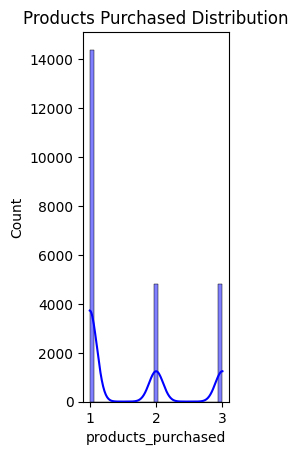

In [8]:
plt.subplot(1,3,1)
sns.histplot(df['products_purchased'], kde=True, color='blue')
plt.title('Products Purchased Distribution')

Text(0.5, 1.0, 'Complains Distribution')

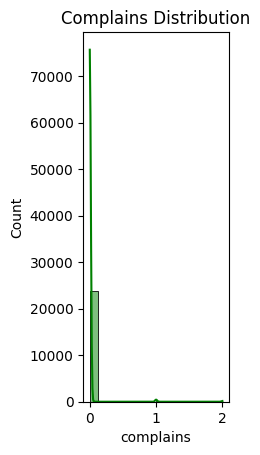

In [9]:
plt.subplot(1,3,2)
sns.histplot(df['complains'], kde=True, color='green')
plt.title('Complains Distribution')

Text(0.5, 1.0, 'Money Spent Distribution')

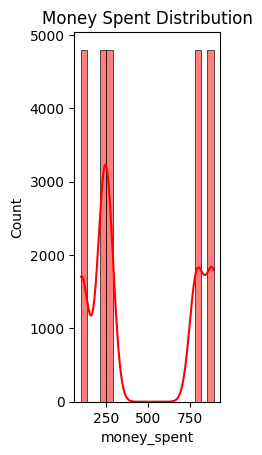

In [10]:
plt.subplot(1,3,3)
sns.histplot(df['money_spent'], kde=True, color='red')
plt.title('Money Spent Distribution')


In [11]:
plt.show()

In [12]:
df['complaints_per_product'] = df['complains']/df['products_purchased']

In [13]:
df.replace([np.inf , -np.inf], np.nan, inplace=True)
df.fillna(0 , inplace=True)

In [14]:
X = df[['products_purchased', 'complains', 'money_spent']]

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(X_scaled)


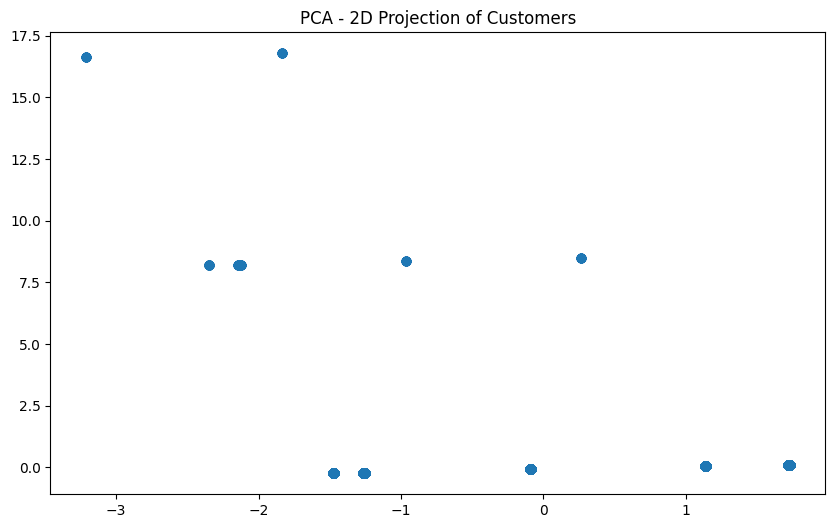

In [17]:
plt.figure(figsize = (10 , 6))
plt.scatter(x_pca[:,0], x_pca[:, 1])
plt.title('PCA - 2D Projection of Customers')
plt.show()

In [18]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

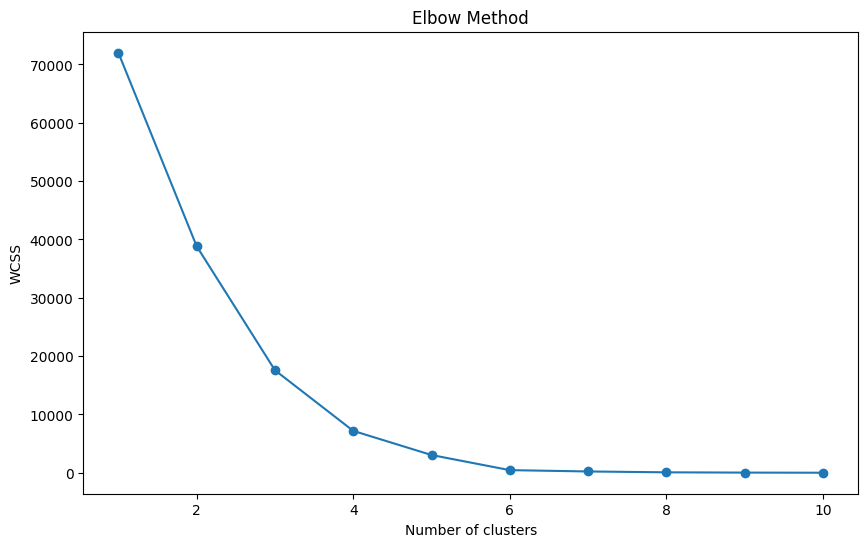

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)
df['Cluster_KMeans'] = y_kmeans

In [21]:
dbscan = DBSCAN(eps=0.5 , min_samples = 5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

In [22]:
agglo = AgglomerativeClustering(n_clusters = 4)
df['Cluster_Agglomerative'] = agglo.fit_predict(X_scaled)

In [23]:
plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

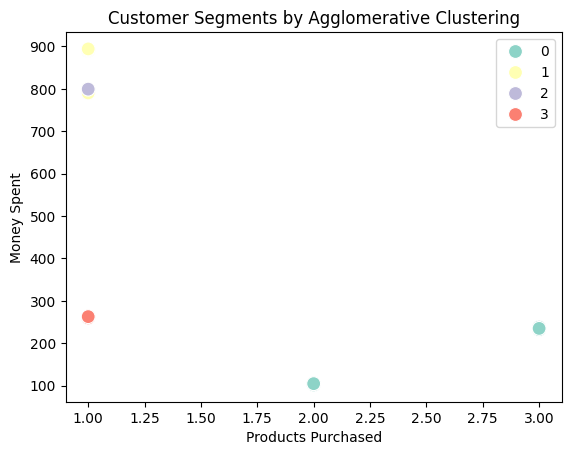

In [34]:
sns.scatterplot(x=df['products_purchased'], y=df['money_spent'], 
                hue=df['Cluster_Agglomerative'], palette='Set3', s=100)
plt.title('Customer Segments by Agglomerative Clustering')
plt.xlabel('Products Purchased')
plt.ylabel('Money Spent')
plt.legend()
plt.show()

In [26]:
cluster_analysis_agglo = df.groupby('Cluster_Agglomerative').mean()
print(cluster_analysis_agglo)

                        customer_id  products_purchased  complains  \
Cluster_Agglomerative                                                
0                      1.002289e+06            2.501253       0.00   
1                      1.002149e+06            1.000000       0.00   
2                      1.001838e+06            1.125000       1.25   
3                      1.000660e+06            1.000000       0.00   

                       money_spent  complaints_per_product  Cluster_DBSCAN  
Cluster_Agglomerative                                                       
0                       169.518797                  0.0000        2.498747  
1                       842.092658                  0.0000        1.000000  
2                       610.800000                  1.1875        6.000000  
3                       261.005051                  0.0000        0.000000  


In [27]:
df['Cluster'] = y_kmeans

In [28]:
from scipy.stats import ttest_ind


In [29]:
plt.figure(figsize=(12,8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

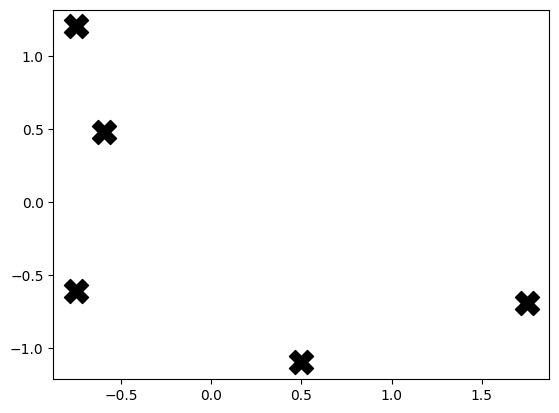

In [30]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], 
            s=300, c='black', label='Centroids', marker='X')

In [31]:
cluster_analysis = df.groupby('Cluster').mean()
print(cluster_analysis)

          customer_id  products_purchased  complains  money_spent  \
Cluster                                                             
0        1.002149e+06               1.000       0.00   842.092658   
1        1.002166e+06               3.000       0.00   234.950000   
2        1.000660e+06               1.000       0.00   261.005051   
3        1.001838e+06               1.125       1.25   610.800000   
4        1.002413e+06               2.000       0.00   103.758794   

         complaints_per_product  Cluster_DBSCAN  Cluster_Agglomerative  
Cluster                                                                 
0                        0.0000             1.0                    1.0  
1                        0.0000             2.0                    0.0  
2                        0.0000             0.0                    3.0  
3                        1.1875             6.0                    2.0  
4                        0.0000             3.0                    0.0  


In [32]:
plt.show()